In [ ]:
import pandas as pd

In [ ]:
import nltk
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
# Get the GPU device name.
device_name = tf.test.gpu_device_name()
# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch
# If there's a GPU available...
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
news = pd.read_csv('/content/text_label_sentiment.csv')

FileNotFoundError: ignored

In [ ]:
news.head()

In [ ]:
news.drop(['Unnamed: 0','sentiment'],axis=1,inplace=True)

In [ ]:
news.head()

In [ ]:
news.dropna()

In [ ]:
hindi_stopwords = [
    'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'इस', 'इसके', 'इसको', 'इसमें', 'इससे',
    'उनका', 'उनकी', 'उनके', 'उनको', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हें', 'उसका',
    'उसकी', 'उसके', 'उसको', 'उसमें', 'उसने', 'उसी', 'उसे', 'उसका', 'करता', 'करते',
    'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'कारण', 'किसी', 'की', 'कुछ', 'के',
    'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन',
    'जिन्होंने', 'जिन्हों', 'जिस', 'जिसे', 'जी', 'जिसके', 'जिसको', 'जिसमें', 'जिसे', 'तक',
    'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'था', 'थे', 'दिया', 'दूसरे',
    'दो', 'द्वारा', 'ने', 'पर', 'पहले', 'पूरा', 'पूरी', 'फिर', 'बनी', 'बहुत', 'बाद',
    'बाला', 'भी', 'मगर', 'मानो', 'मैं', 'मैंने', 'में', 'यदि', 'यह', 'यहाँ', 'यही',
    'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'लिए', 'लिया', 'लेकिन', 'व', 'वगेरह', 'वर्ग',
    'वह', 'वहाँ', 'वही', 'वाले', 'वाली', 'वाला', 'वाले', 'वाली', 'वाला', 'वाले', 'वाली',
    'वाला', 'सबसे', 'सबसे', 'सकता', 'सकते', 'सकती', 'सकती', 'सब', 'सबसे', 'से', 'ही',
    'है', 'हैं', 'हुआ', 'हुई', 'हुए', 'हो', 'होता', 'होते', 'होती', 'होती', 'होते', 'होते',
    'होती', 'होती', 'होती', 'होना', 'होने', 'अंदर', 'अदि', 'अन्य', 'अप', 'अफ', 'अल', 'अलब',
    'अव', 'अवश्य', 'अस', 'आदि', 'आप', 'आपका', 'आपकी', 'आपके', 'आपने', 'आपने', 'आदि', 'आना',
    'इंहोंने', 'इंहें', 'इंहों', 'इतना', 'इतनी', 'इतने', 'इन', 'इनका', 'इनकी', 'इनके', 'इन्ही',
    'इन्होंने', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसी', 'उंहोंने', 'उंहें',
    'उंहों', 'उपर', 'उसके', 'उससे', 'उसी', 'उसे', 'उसी', 'उसे', 'कर', 'करत', 'करता', 'करती',
    'करते', 'करन', 'करना', 'करने', 'किया', 'किये', 'किये', 'किया', 'कुछ', 'कुल', 'के', 'को', 'को'
]


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download("indian")

nltk.download("stopwords")
def remove_hindi_stopwords(text):
    words = nltk.word_tokenize(text)
    cleaned_words = []
    for word in words:
        # Remove specific words
        if word.lower() not in hindi_stopwords:
            # Remove English words and special characters
            if not re.match("^[A-Za-z]*$", word) and not bool(re.search(r'[0-9०-९]', word)):
                # Specify special characters to remove (e.g., @, ., ,, #, &)
                word = re.sub(r'[.,@#&]', '', word)
                cleaned_words.append(word)
    return ' '.join(cleaned_words)



[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Unzipping corpora/indian.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
news['text']=news['text'].apply(str)

news['text'] = news['text'].apply(remove_hindi_stopwords)

In [ ]:
news['title']=news['title'].apply(str)

news['title'] = news['title'].apply(remove_hindi_stopwords)

In [ ]:
news['title']

0       हाउस डिम एड : हमने जेसन चैफेट ट्वीट कॉमी पत्र ...
1       फ्लिन : हिलेरी क्लिंटन  कैंपस बड़ी महिला - ब्र...
2                                   सत्य क्यों आपको निकाल
3       एकल अमेरिकी हवाई हमले मारे गए नागरिकों पहचान ल...
4       ईरानी महिला व्यभिचार मौत घाट उतारने महिला बारे...
                              ...                        
2050    मडावो पोसबिलिटी ट्रम्प  कैंपेन इनोसेंट और ' स्...
2051    जॉन किर्बी अंतिम दिन : हापलेस स्टेट रेप स्वामि...
2052    बड़ा खुलासा ! ममता बनर्जी ब्लैक मनी मोदी हमला ...
2053    एक संघर्ष थीम पार्क पूछता : क्या सांता विश्वास...
2054    वीडियो  सैक्रामेंटो पुलिस कार हिट कार हिट मैन ...
Name: title, Length: 2055, dtype: object

In [ ]:
#split train test
from sklearn.model_selection import train_test_split
train, test, labels, y_test = train_test_split(news['text'], news['label'], test_size=0.2, stratify=news['label'],random_state=123, shuffle=True)

sentences = train.values
labels=labels.values


In [ ]:
sentences

array(['“ : – – ” – – wing-men',
       '’ — ( ) — “ ‘ ’ ” — “ ! ! ! ” “ ” — “ — ! ” — : “ ? ” ? “ ’ ” “ ” “ ” “ ” : “ ’ ” “ ! ” ” ’ ” “ ” “ ” — “ ” — ’ “ ” “ ” ’ : ’ — — “ ” : — — : ’ ’ ’ “ ” — “ ” : ’ “ ” ’ ’ — “ ” “ ” : “ ” ’ “ ” “ ” ’ “ ” — — ’ “ ” ’ “ ” “ ’ ” “ ’ ” “ ’ ” “ ” — ’ “ ” “ ” ’ ’ ’ : “ ’ ” “ ” “ ’ ” “ ” — “ ” — “ ’ ” “ ” “ ” “ ’ “ — — — “ ” “ ” : “ ! ” — — “ ” ’ ’ “ ” : “ ” ’ “ ” “ ‘ ? ’ ‘ ’ ‘ ’ ’ ” “ ’ ”',
       '- इराकी बलों मोसुल हासिल कोशिश मंगलवार शहर पश्चिमी हिस्से प्रवेश इस्लामिक स्टेट आतंकवादियों साथ भारी झड़पों दौरान एक पुल और कई सार्वजनिक इमारतों बना दिया। नागरिकों बताया कि फरवरी बमबारी और गोलाबारी भारी थी शहर पश्चिमी हिस्से चलाने ऑपरेशन शुरुआत - देश जहां लगभग एक मिलियन लोग फंस गए और हताश परिस्थितियों रह हैं। सैनिकों केंद्रीय बैंक एक शाखा हटा एक पुरातात्विक संग्रहालय शहर ले जाने जिहादियों तोड़फोड़ थी और शहर केंद्र तिगरी नदी पार हुरिया ब्रिज। एक सैन्य प्रवक्ता जनरल याहया रसूल फोन करके कहा। उन्होंने `` हम मोसुल आजाद नहीं करेंगे हम नहीं रुकेंगे। `` संघीय पुलिस प

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased', do_lower_case=True) #bert-base-

Loading BERT tokenizer...


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
for sent in sentences:
    # `encode` will:  (1) Tokenize the sentence.   (2) Prepend the `[CLS]` token to the start.  (3) Append the `[SEP]` token to the end. (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,
                        add_special_tokens = True,  # Add '[CLS]' and '[SEP]'
                        max_length = 500,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)
# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[1])
print('Token IDs:', input_ids[1])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original:  ’ — ( ) — “ ‘ ’ ” — “ ! ! ! ” “ ” — “ — ! ” — : “ ? ” ? “ ’ ” “ ” “ ” “ ” : “ ’ ” “ ! ” ” ’ ” “ ” “ ” — “ ” — ’ “ ” “ ” ’ : ’ — — “ ” : — — : ’ ’ ’ “ ” — “ ” : ’ “ ” ’ ’ — “ ” “ ” : “ ” ’ “ ” “ ” ’ “ ” — — ’ “ ” ’ “ ” “ ’ ” “ ’ ” “ ’ ” “ ” — ’ “ ” “ ” ’ ’ ’ : “ ’ ” “ ” “ ’ ” “ ” — “ ” — “ ’ ” “ ” “ ” “ ’ “ — — — “ ” “ ” : “ ! ” — — “ ” ’ ’ “ ” : “ ” ’ “ ” “ ‘ ? ’ ‘ ’ ‘ ’ ’ ” “ ’ ”
Token IDs: [101, 100, 100, 113, 114, 100, 100, 100, 100, 100, 100, 100, 106, 106, 106, 100, 100, 100, 100, 100, 100, 106, 100, 100, 131, 100, 136, 100, 136, 100, 100, 100, 100, 100, 100, 100, 100, 100, 131, 100, 100, 100, 100, 106, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 131, 100, 100, 100, 100, 100, 131, 100, 100, 131, 100, 100, 100, 100, 100, 100, 100, 100, 131, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 131, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100

<Axes: >

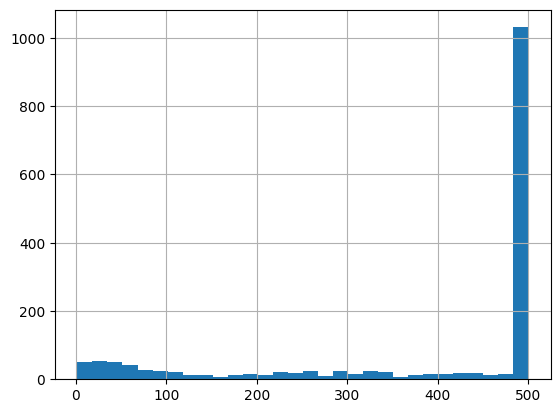

In [ ]:
seq_len = [len(sen) for sen in input_ids]
pd.Series(seq_len).hist(bins = 30)

In [ ]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  500


In [ ]:
# We'll borrow the `pad_sequences` utility function to do padding.
from keras.preprocessing.sequence import pad_sequences
# Set the maximum sequence length as 128 , as it should be slightly above 105
MAX_LEN = 128
print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)
print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))
# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence, as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long",
                          value=0, truncating="post", padding="post")
print('\Done.')


Padding/truncating all sentences to 128 values...

Padding token: "[PAD]", ID: 0
\Done.


In [ ]:
# Create attention masks
attention_masks = []
for sent in input_ids:

    # Create the attention mask. If a token ID is 0, then it's padding, set the mask to 0. If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]

    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)


In [ ]:
# Use train_test_split to split our data into train and validation sets for training, 10% validation
from sklearn.model_selection import train_test_split
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
                                                            random_state=123, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=123, test_size=0.1)

In [ ]:
import torch

In [ ]:
# Convert all inputs and labels into torch tensors, the required datatype for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
# The DataLoader needs to know our batch size for training, so we specify it here.
batch_size = 32
# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)
# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())
print('The BERT model has {:} different named parameters.\n'.format(len(params)))
print('==== Embedding Layer ====\n')
for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== First Transformer ====\n')
for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== Output Layer ====\n')
for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))


The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (105879, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
from transformers import get_linear_schedule_with_warmup

epochs = 5
# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs
# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import numpy as np
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128
# Set the seed value all over the place to make this reproducible.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
# Store the average loss after each epoch so we can plot them.
loss_values = []
start=time.time()
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    t0 = time.time()
    total_loss = 0
    model.train()
    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
        # Unpack this training batch from our dataloader.
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        # Always clear any previously calculated gradients before performing a backward pass.

        model.zero_grad()
        # Perform a forward pass .This will return the loss .
        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        # The call to `model` always returns a tuple, so we need to pull the loss value out of the tuple.
        loss = outputs[0]
        # Accumulate the training loss over all of the batches so that we can calculate the average loss at the end. `loss` is a Tensor containing a single value
        total_loss += loss.item()
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # Clip the norm of the gradients to 1.0. This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # Update parameters and take a step using the computed gradient.
        optimizer.step()
        # Update the learning rate.
        scheduler.step()
    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on our validation set.
    print("")
    print("Running Validation...")
    t0 = time.time()
    # Put the model in evaluation mode--the dropout layers behave differently during evaluation.
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    for batch in validation_dataloader:

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and  speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions. This will return the logits rather than the loss because we have not provided labels.
            # token_type_ids is the same as the "segment ids"
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # Get the "logits" output by the model.
        logits = outputs[0]
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy
        # Track the number of batches
        nb_eval_steps += 1
    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
print("")
print("Training complete!")
end=time.time()


======== Epoch 1 / 5 ========
Training...
  Batch    40  of     47.    Elapsed: 0:00:30.

  Average training loss: 0.57
  Training epcoh took: 0:00:34

Running Validation...
  Accuracy: 0.83
  Validation took: 0:00:01

======== Epoch 2 / 5 ========
Training...
  Batch    40  of     47.    Elapsed: 0:00:28.

  Average training loss: 0.28
  Training epcoh took: 0:00:32

Running Validation...
  Accuracy: 0.91
  Validation took: 0:00:01

======== Epoch 3 / 5 ========
Training...
  Batch    40  of     47.    Elapsed: 0:00:27.

  Average training loss: 0.17
  Training epcoh took: 0:00:32

Running Validation...
  Accuracy: 0.88
  Validation took: 0:00:01

======== Epoch 4 / 5 ========
Training...
  Batch    40  of     47.    Elapsed: 0:00:27.

  Average training loss: 0.09
  Training epcoh took: 0:00:32

Running Validation...
  Accuracy: 0.91
  Validation took: 0:00:01

======== Epoch 5 / 5 ========
Training...
  Batch    40  of     47.    Elapsed: 0:00:27.

  Average training loss: 0.04
  T

In [ ]:
import plotly.express as px
f = pd.DataFrame(loss_values)
f.columns=['Loss']
fig = px.line(f, x=f.index, y=f.Loss)
fig.update_layout(title='Training loss of the Model',
                   xaxis_title='Epoch',
                   yaxis_title='Loss')
fig.show()

In [ ]:
sentences = test.values
labels = y_test.values
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
for sent in sentences:

    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256
                   )

    input_ids.append(encoded_sent)
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN,
                          dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)
# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)
# Set the batch size.
batch_size = 32
# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))
# Put model in evaluation mode
model.eval()

predictions , true_labels = [], []
# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch


  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)
  logits = outputs[0]
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)
print('DONE.')

Predicting labels for 411 test sentences...
DONE.


In [ ]:
import joblib
joblib.dump(model,'/content/drive/MyDrive/NLP DATA/fakenews_classifier.pkl')

['/content/drive/MyDrive/NLP DATA/fakenews_classifier.pkl']

In [ ]:
count=0
guesses=[]
actual=[]
# For each input batch...
for i in range(len(true_labels)):

  # The predictions for this batch are a 2-column ndarray (one column for "0" and one column for "1"). Pick the label with the highest value and turn this in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()


  #calculate accuracy
  for j in range(len(pred_labels_i)):
    if(pred_labels_i[j]==true_labels[i][j]):
      count+=1
    guesses.append(pred_labels_i[j])
    actual.append(true_labels[i][j])


accuracy = count/len(y_test)

In [ ]:
print(accuracy)

0.9124087591240876


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


print(accuracy_score(actual, guesses))
print(recall_score(actual, guesses))
print(precision_score(actual, guesses))
print(f1_score(actual, guesses))

0.9124087591240876
0.8817733990147784
0.93717277486911
0.9086294416243654


In [ ]:
print(end-start)

166.95828890800476
